In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from bioinfokit.visuz import cluster
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_data = pd.read_csvcar_data = pd.read_csv("C:/Users/Nirmal/Documents/Python Scripts/EV_Data.csv")
car_data

,Model_Name,Price,Battery_Capacity,Drive_Range,Power (in bhp),Charge_Time (in hrs),Top_Speed,Body_Type,Category
0,MG Comet EV,798000,17.30,230,41.42,3.5,100.0,Hatchback,4-wheeler
1,Tata Tiago EV,799000,19.20,250,73.75,3.6,120.0,Hatchback,4-wheeler
2,Tata Tigor EV,1249000,26.00,315,73.75,10.0,120.0,Sedan,4-wheeler
3,MG ZS EV,1898000,50.30,461,174.33,10.5,175.0,SUV,4-wheeler
4,BYD Atto 3,2499000,60.48,521,201.15,9.0,160.0,SUV,4-wheeler
...,...,...,...,...,...,...,...,...,...
113,Bajaj RE E TEC 9.0,376000,8.90,178,6.00,4.0,45.0,Rickshaw,3-wheeler
114,Greaves Eltra City,366000,10.80,160,9.50,6.0,49.5,Rickshaw,3-wheeler
115,Erisha E Smart,387000,10.20,160,14.00,4.3,50.0,Rickshaw,3-wheeler
116,E-Trio Touro Mini Passenger LA,187000,6.70,90,3.35,8.0,25.0,Rickshaw,3-wheeler


In [3]:
car_data2 = car_data.drop(["Model_Name", "Body_Type"], axis = 1)
car_data2

,Price,Battery_Capacity,Drive_Range,Power (in bhp),Charge_Time (in hrs),Top_Speed,Category
0,798000,17.30,230,41.42,3.5,100.0,4-wheeler
1,799000,19.20,250,73.75,3.6,120.0,4-wheeler
2,1249000,26.00,315,73.75,10.0,120.0,4-wheeler
3,1898000,50.30,461,174.33,10.5,175.0,4-wheeler
4,2499000,60.48,521,201.15,9.0,160.0,4-wheeler
...,...,...,...,...,...,...,...
113,376000,8.90,178,6.00,4.0,45.0,3-wheeler
114,366000,10.80,160,9.50,6.0,49.5,3-wheeler
115,387000,10.20,160,14.00,4.3,50.0,3-wheeler
116,187000,6.70,90,3.35,8.0,25.0,3-wheeler


In [4]:
car_data.isnull().sum()

Model_Name              0
Price                   0
Battery_Capacity        0
Drive_Range             0
Power (in bhp)          0
Charge_Time (in hrs)    0
Top_Speed               0
Body_Type               0
Category                0
dtype: int64

In [5]:
car_data["Category"].value_counts()

Category
2-wheeler    48
4-wheeler    40
3-wheeler    30
Name: count, dtype: int64

In [6]:
car_data["Body_Type"].value_counts()

Body_Type
Scooter      34
SUV          20
Rickshaw     16
Bike         14
Tempo        14
Sedan        12
Hatchback     7
MUV           1
Name: count, dtype: int64

In [7]:
pd.options.display.float_format = '{:.2f}'.format
average_price_by_category = car_data.groupby('Category')['Price'].mean()
print(average_price_by_category)

Category
2-wheeler    109853.06
3-wheeler    261250.00
4-wheeler   9455940.95
Name: Price, dtype: float64


Text(0, 0.5, 'Price')

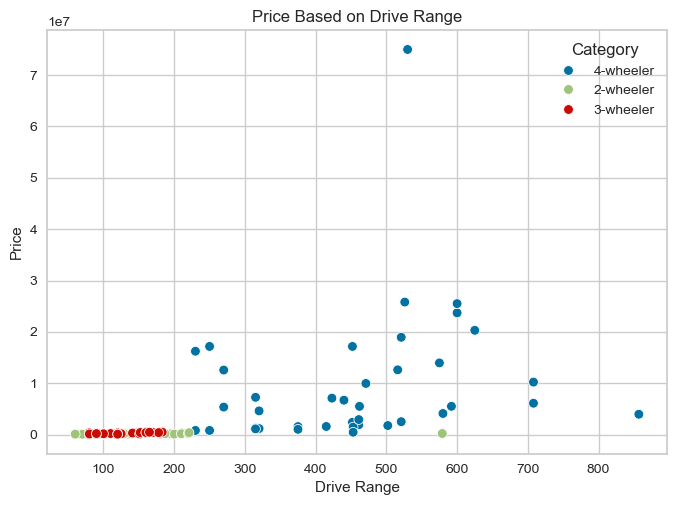

In [8]:
sns.scatterplot(x="Drive_Range", y="Price", hue="Category", data=car_data)
plt.title("Price Based on Drive Range")
plt.xlabel("Drive Range")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

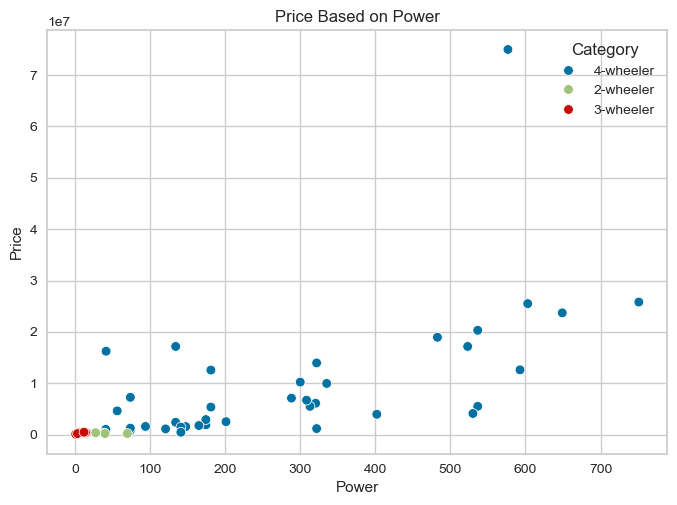

In [9]:
sns.scatterplot(x="Power (in bhp)", y="Price", hue="Category", data=car_data)
plt.title("Price Based on Power")
plt.xlabel("Power")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

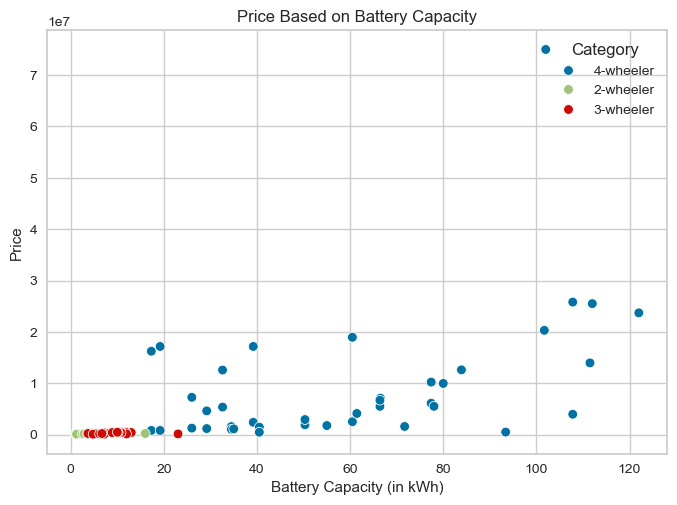

In [10]:
sns.scatterplot(x="Battery_Capacity", y="Price", hue="Category", data=car_data)
plt.title("Price Based on Battery Capacity")
plt.xlabel("Battery Capacity (in kWh)")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

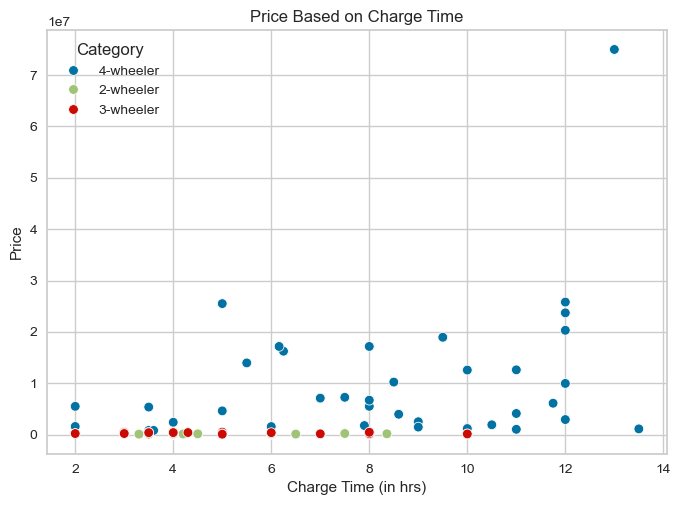

In [11]:
sns.scatterplot(x="Charge_Time (in hrs)", y="Price", hue="Category", data=car_data)
plt.title("Price Based on Charge Time")
plt.xlabel("Charge Time (in hrs)")
plt.ylabel("Price")

In [12]:
car_data2["Category"] = car_data2["Category"].replace(to_replace="4-wheeler", value=1)
car_data2["Category"] = car_data2["Category"].replace(to_replace="2-wheeler", value=2)
car_data2["Category"] = car_data2["Category"].replace(to_replace="3-wheeler", value=3)

In [13]:
car_data2

,Price,Battery_Capacity,Drive_Range,Power (in bhp),Charge_Time (in hrs),Top_Speed,Category
0,798000,17.30,230,41.42,3.50,100.00,1
1,799000,19.20,250,73.75,3.60,120.00,1
2,1249000,26.00,315,73.75,10.00,120.00,1
3,1898000,50.30,461,174.33,10.50,175.00,1
4,2499000,60.48,521,201.15,9.00,160.00,1
...,...,...,...,...,...,...,...
113,376000,8.90,178,6.00,4.00,45.00,3
114,366000,10.80,160,9.50,6.00,49.50,3
115,387000,10.20,160,14.00,4.30,50.00,3
116,187000,6.70,90,3.35,8.00,25.00,3


In [14]:
car_data_scaled = StandardScaler().fit_transform(car_data2)

In [15]:
pca = PCA()
car_pca = pca.fit_transform(car_data_scaled)

n_components = min(car_data_scaled.shape)  

std_dev = np.sqrt(pca.explained_variance_)
prop_variance = pca.explained_variance_ratio_
cum_prop = np.cumsum(prop_variance)

results = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': prop_variance,
    'Cumulative Proportion': cum_prop
}, index=[f'PC{i+1}' for i in range(n_components)])

print(results.round(4))

     Standard deviation  Proportion of Variance  Cumulative Proportion
PC1                2.24                    0.71                   0.71
PC2                0.83                    0.10                   0.81
PC3                0.78                    0.09                   0.90
PC4                0.62                    0.05                   0.95
PC5                0.38                    0.02                   0.97
PC6                0.35                    0.02                   0.99
PC7                0.30                    0.01                   1.00


In [16]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_data = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_data['feature'] = car_data2.columns.values
loadings_data = loadings_data.set_index('feature')
print(loadings_data.round(2))

                       PC1   PC2   PC3   PC4   PC5   PC6   PC7
feature                                                       
Price                 0.33  0.46  0.64  0.41  0.17 -0.24 -0.15
Battery_Capacity      0.41 -0.09  0.12 -0.41 -0.07 -0.45  0.66
Drive_Range           0.41 -0.21 -0.11 -0.43  0.35 -0.22 -0.65
Power (in bhp)        0.41  0.11  0.17 -0.24 -0.69  0.47 -0.18
Charge_Time (in hrs)  0.29  0.67 -0.67  0.07  0.07  0.01  0.08
Top_Speed             0.41 -0.26  0.03  0.18  0.50  0.63  0.29
Category             -0.36  0.46  0.29 -0.62  0.33  0.29  0.07


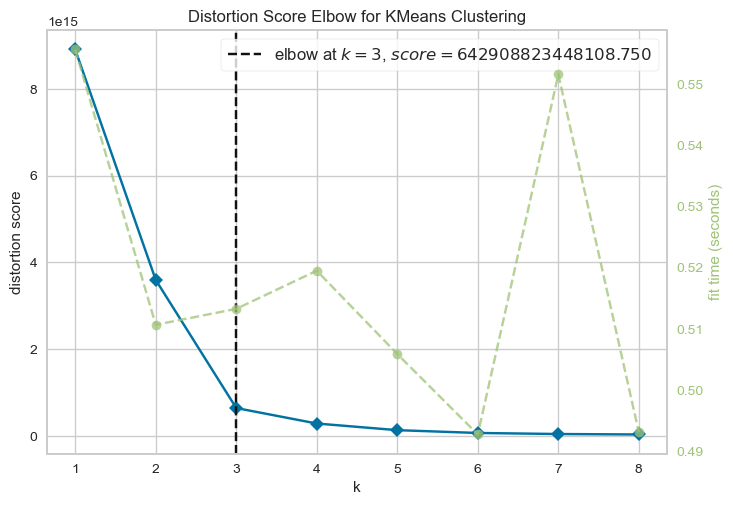

In [17]:
model = KMeans(n_init = 10, random_state = 1234)
visualizer = KElbowVisualizer(model, k = (1,9), metric = 'distortion', timings = True)
visualizer.fit(car_data2)
visualizer.show()
plt.show()

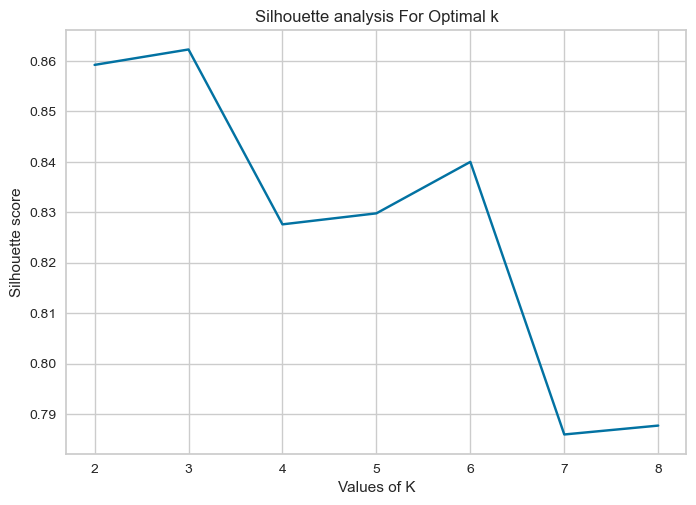

In [18]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(car_data2)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(car_data2, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

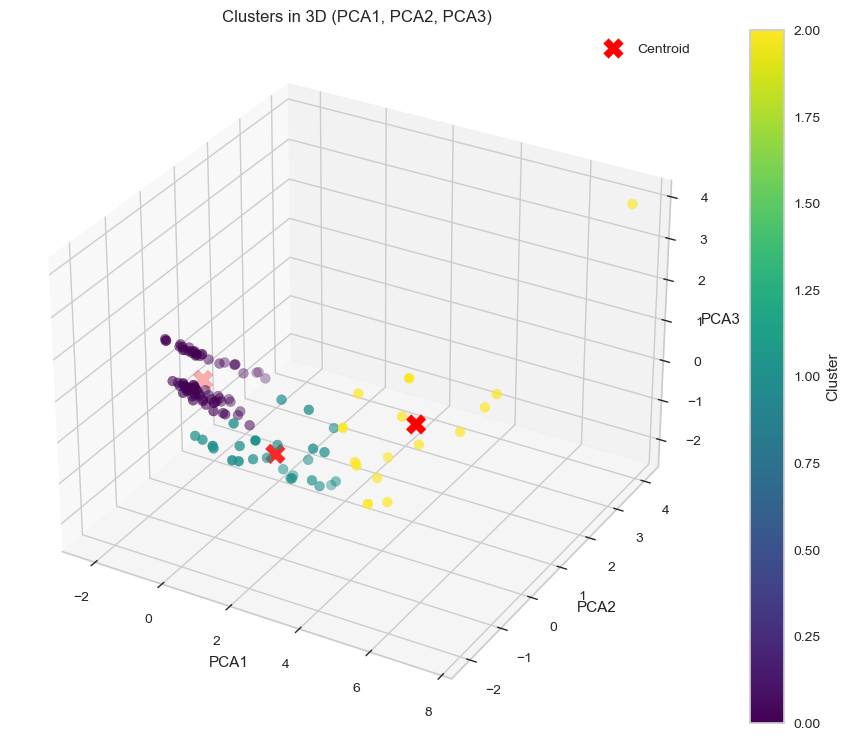

In [19]:
kmeans = KMeans(n_clusters=3, random_state=0)
car_data2['Cluster'] = kmeans.fit_predict(car_pca)
car_data2['PCA1'] = car_pca[:, 0]
car_data2['PCA2'] = car_pca[:, 1]
car_data2['PCA3'] = car_pca[:, 2]

centroids = car_data2.groupby('Cluster').mean()[['PCA1', 'PCA2', 'PCA3']].values

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    car_data2['PCA1'], 
    car_data2['PCA2'], 
    car_data2['PCA3'], 
    c=car_data2['Cluster'], 
    cmap='viridis', 
    s=50
)

ax.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    centroids[:, 2], 
    s=200, 
    c='red', 
    marker='X', 
    label='Centroid'
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Clusters in 3D (PCA1, PCA2, PCA3)')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()

In [20]:
cluster_analysis = car_data2.groupby('Cluster').mean()
pd.set_option('display.float_format', '{:.0f}'.format)
cluster_analysis_cleaned = cluster_analysis.drop(['PCA1', 'PCA2', 'PCA3'], axis=1)
cluster_analysis_cleaned

,Price,Battery_Capacity,Drive_Range,Power (in bhp),Charge_Time (in hrs),Top_Speed,Category
Cluster,,,,,,,
0,167668,5,119,6,5,55,2
1,4064654,42,378,143,7,160,1
2,18183776,87,577,497,10,223,1
